## **Semana de Data Science**

- Minerando Dados

### Conhecendo a base de dados

Monta o drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importando as bibliotecas básicas

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Carregando a Base de Dados

In [3]:
# carrega o dataset de london
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# descrição do dataset
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# cria um dataframe pandas
data = pd.DataFrame(boston.data, columns=boston.feature_names)

Adicionando a coluna que será nossa variável alvo

In [6]:
# adiciona a variável MEDV
data['MEDV'] = boston.target

In [7]:
# filtra os top 16 maiores registro da coluna MEDV
top16 = data.nlargest(16, 'MEDV').index

In [8]:
# remove os valores listados em top16
data.drop(top16, inplace=True)

**Definindo um Baseline**

- `Uma baseline é importante para ter marcos no projeto`.
- `Permite uma explicação fácil para todos os envolvidos`.
- `É algo que sempre tentaremos ganhar na medida do possível`.

In [9]:
# converte os dados
data.RM = data.RM.astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    float64
 4   NOX      490 non-null    float64
 5   RM       490 non-null    int64  
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    float64
 9   TAX      490 non-null    float64
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  MEDV     490 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 57.4 KB


In [11]:
# estatística descritiva da coluna numero de quartos
data.RM.describe()

count    490.000000
mean       5.740816
std        0.737657
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: RM, dtype: float64

In [12]:
# definindo a regra para categorizar os dados
categorias = []

In [13]:
# alimenta a lista categorias
for i in data.RM.iteritems():
  valor = (i[1])
  if valor <= 4:
    categorias.append('Pequeno')
  elif valor < 7:
    categorias.append('Medio')
  else:
    categorias.append('Grande')

In [14]:
# cria a coluna categorias
data['categorias'] = categorias

In [15]:
# imprime a contagem de categorias
data.categorias.value_counts()

Medio      424
Grande      52
Pequeno     14
Name: categorias, dtype: int64

In [16]:
# agrupa as categorias e calcula as médias
medias_categorias = data.groupby(by='categorias')['MEDV'].mean()

In [17]:
# visualizando a variável medias_categorias
medias_categorias

categorias
Grande     35.719231
Medio      20.130425
Pequeno    14.921429
Name: MEDV, dtype: float64

In [18]:
# criando o dicionario com chaves medio, grande e pequeno e seus valores
dic_baseline = {'Grande': medias_categorias[0], 'Medio': medias_categorias[1], 'Pequeno': medias_categorias[2]}

In [19]:
# imprime dicionario
dic_baseline

{'Grande': 35.71923076923077,
 'Medio': 20.1304245283019,
 'Pequeno': 14.921428571428574}

In [20]:
# cria a função retorna baseline
def retorna_baseline(num_quartos):
  if num_quartos <= 4:
    return dic_baseline.get('Pequeno')
  elif num_quartos < 7:
    return dic_baseline.get('Medio')
  else:
    return dic_baseline.get('Grande')

In [21]:
# chama a função retorna baseline
retorna_baseline(7)

35.71923076923077

In [22]:
for i in data.RM.iteritems():
  n_quartos = i[1]
  print('Número de quartos é: {} , Valor médio: {}'.format(n_quartos,retorna_baseline(n_quartos)))

Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 7 , Valor médio: 35.71923076923077
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 7 , Valor médio: 35.71923076923077
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 6 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número de quartos é: 5 , Valor médio: 20.1304245283019
Número d

In [23]:
# imprime as 5 primeiras linhas do dataframe
data.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  PTRATIO       B  LSTAT  MEDV  categorias
0  0.00632  18.0   2.31   0.0  0.538  ...     15.3  396.90   4.98  24.0       Medio
1  0.02731   0.0   7.07   0.0  0.469  ...     17.8  396.90   9.14  21.6       Medio
2  0.02729   0.0   7.07   0.0  0.469  ...     17.8  392.83   4.03  34.7      Grande
3  0.03237   0.0   2.18   0.0  0.458  ...     18.7  394.63   2.94  33.4       Medio
4  0.06905   0.0   2.18   0.0  0.458  ...     18.7  396.90   5.33  36.2      Grande

[5 rows x 15 columns]

### Trabalhando com a baseline

Preparando os dados

In [24]:
# remove as colunas colineares, variavel alvo e a coluna categorias 
#ELIMINANDO AS VARIÁVEIS QUE POSSUEM ALTA CORRELAÇÃO ENTRE SI
#REMOVE MDV E categorias PQ FORAM PARA FAZER OS EXPERIMENTOS 
#auxiliares da análise exploratória, não serve para o aprendizado do modelo
X = data.drop(['RAD','TAX','MEDV','DIS','AGE','ZN','categorias'], axis=1)

In [25]:
# variável 'y' é nossa variável alvo
y = data['MEDV']

In [26]:
# Dados na variável X
X.head()

CRIM  INDUS  CHAS    NOX  RM  PTRATIO       B  LSTAT
0  0.00632   2.31   0.0  0.538   6     15.3  396.90   4.98
1  0.02731   7.07   0.0  0.469   6     17.8  396.90   9.14
2  0.02729   7.07   0.0  0.469   7     17.8  392.83   4.03
3  0.03237   2.18   0.0  0.458   6     18.7  394.63   2.94
4  0.06905   2.18   0.0  0.458   7     18.7  396.90   5.33

In [27]:
# Variável alvo
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

1. Aprendizado Supervisionado (regressão/classificação): 
    1. quando se tem um target bem definido (supervisão humana que fez o trabalho de definir o target/rótulo)
1. Aprendizado Não Supervisionado: 
    1. possui apenas os dados, não possui os targets e utilizará clustering (agrupamento) para descobrir o target por si só
1. Reforço: 
    1. algoritmo que usa técnicas não supervisionadas para gerar os targets/rótulos para se retro-alimentar

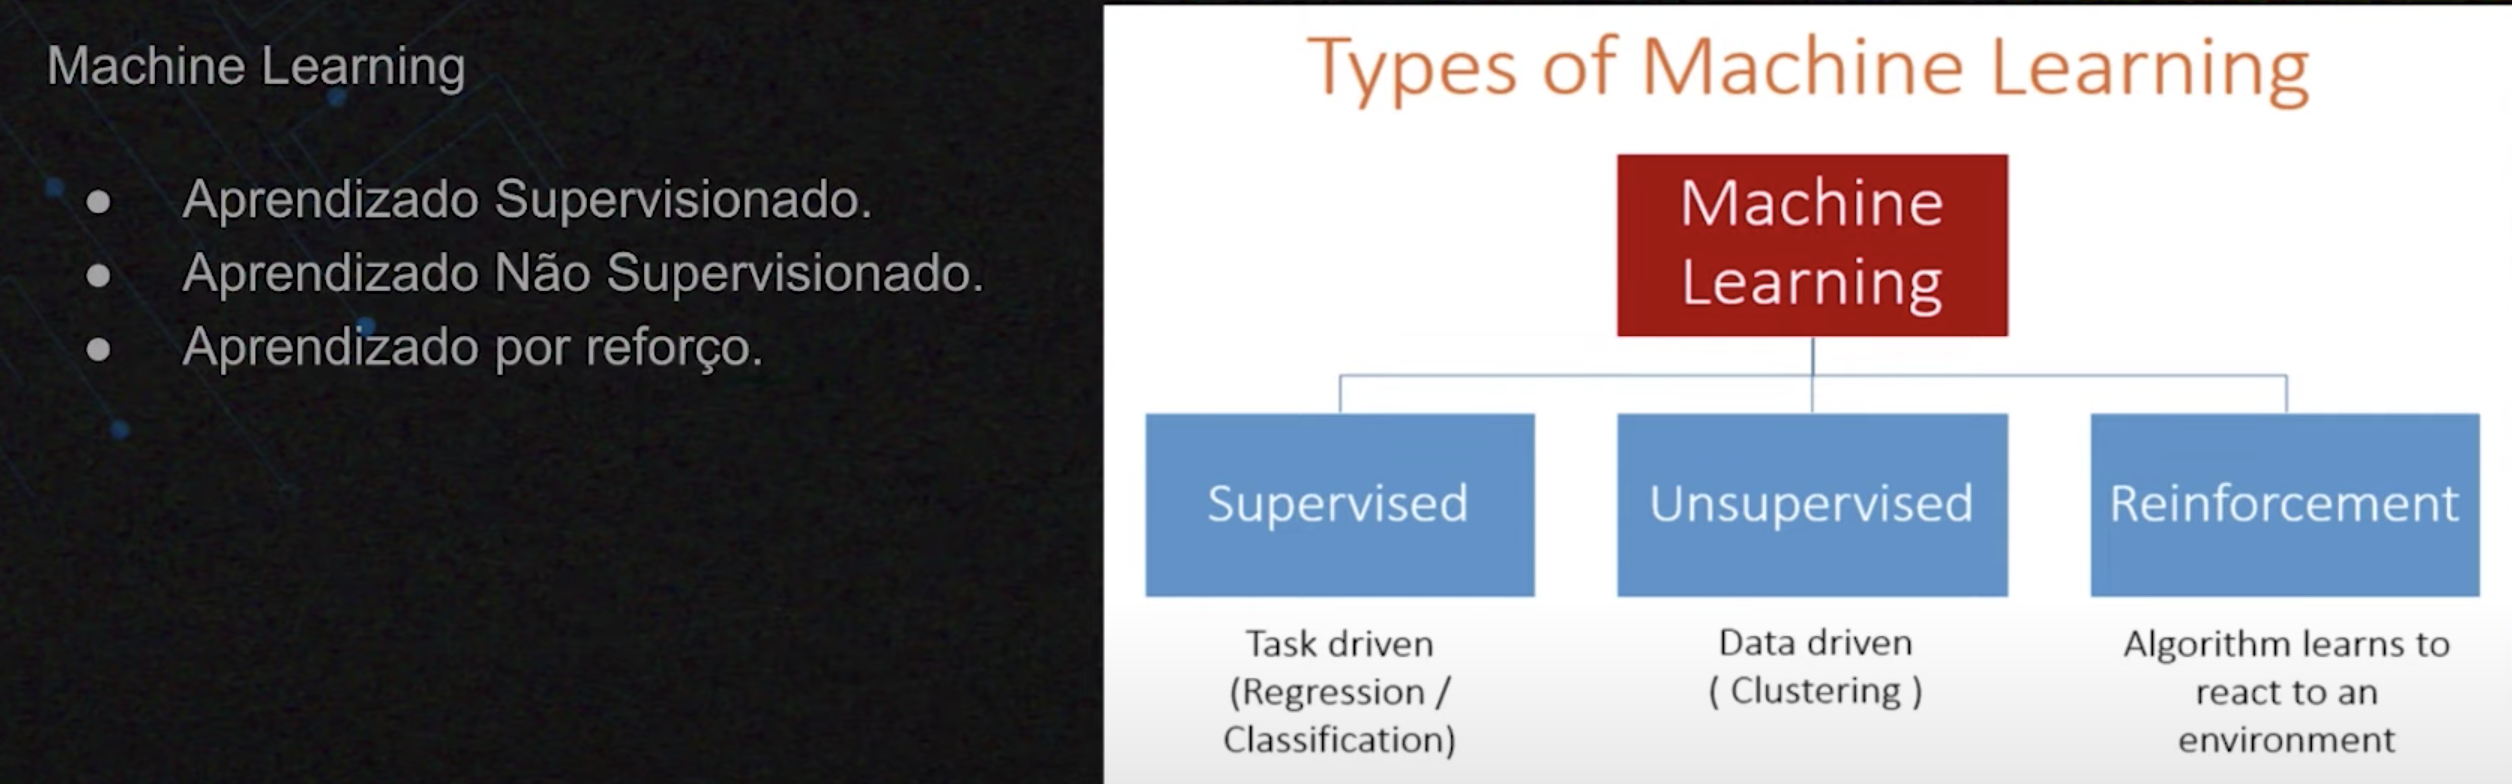

1. Classificação: categorizar algo (ex.: verificar se na foto é um cachorro ou um gato...);
1. Regressão: regredir na história dos dados para aprender a prever valores númericos futuros;
1. Agrupamento (clusterização): identificar amostras semelhantes e agrupá-las em grupos semelhantes.

--> O problema da imobiliária é do tipo regressão, pois o objetivo é prever valores futuros de imóveis.

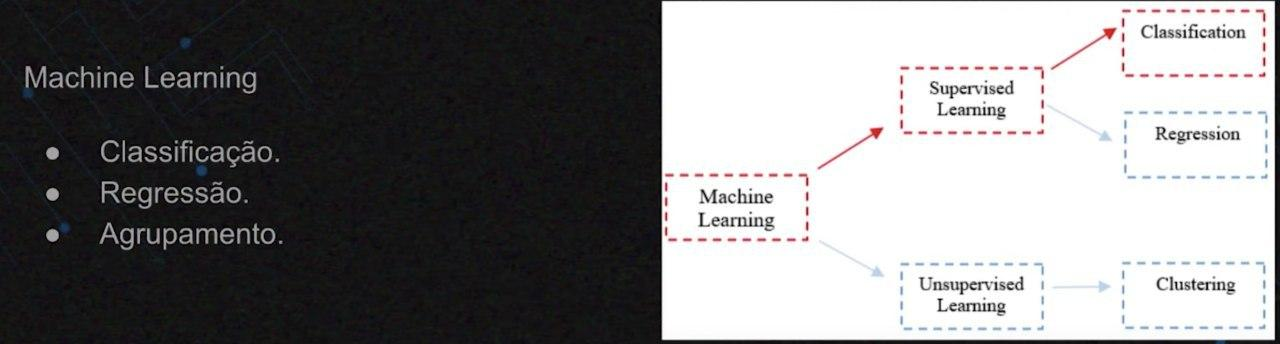

Separando os conjuntos de treino e teste (usando sklearn)

In [28]:
# carrega o método train_test_split
from sklearn.model_selection import train_test_split

In [30]:
# divide os dados entre o conjunto de treino e teste, 80% e 20% respectivamente.
# define qualquer valor para o parâmetro random_state.
#random_state: uma constante nos locais aonde seriam randomizados, 
#isso serve para garantir reprodutividade do experimento, 
#porém em um ambiente de produção é melhor não usar esta variável
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [32]:
# imprime a quantidade de linhas dos conjuntos
#X_train = possui as 8 variáveis/colunas com 392 registros (80%)
#X_test = possui as 8 variáveis/colunas com 98 registros (20%)
#y_train = possui apenas 1 variável/coluna (target) com 392 registros (80%)
#y_test = possui apenas 1 variável/coluna (target) com 98 registros (20%)
print ('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print ('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print ('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print ('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (392, 8)
X_test: numero de linhas e colunas: (98, 8)
y_train: numero de linhas e colunas: (392,)
y_test: numero de linhas e colunas: (98,)


Modelo de baseline

In [33]:
# imprimindo as 5 primeiras linhas dos dados de teste
X_test.head()

CRIM  INDUS  CHAS    NOX  RM  PTRATIO       B  LSTAT
245  0.19133   5.86   0.0  0.431   5     19.1  389.13  18.46
456  4.66883  18.10   0.0  0.713   5     20.2   10.48  19.01
75   0.09512  12.83   0.0  0.437   6     18.7  383.23   8.94
238  0.08244   4.93   0.0  0.428   6     16.6  379.41   6.36
362  3.67822  18.10   0.0  0.770   5     20.2  380.79  10.19

In [37]:
# definindo uma lista de predicoes
predicoes_baseline = []

In [38]:
# para cada elemento do teste alimenta a lista predicoes
for i in X_test.RM.iteritems():
  n_quartos = i[1]
  predicoes_baseline.append(retorna_baseline(n_quartos))

In [39]:
# imprime as 10 primeiras linhas da lista de predicoes
predicoes_baseline[:10]

[20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 35.71923076923077,
 35.71923076923077]

Atribuindo resultados a um dataframe

-   `Manteremos um log ao longo do projeto`
-   `Permite a evolução dado o baseline`



In [40]:
# cria um dataframe vazio
df_results = pd.DataFrame()

In [41]:
# adiciona a coluna valor_real
df_results['valor_real'] = y_test.values

In [43]:
# cria a coluna valor_predito_baseline com as predicoes
df_results['valor_predito_baseline'] = predicoes_baseline

In [44]:
# imprimindo as 10 primeiras linhas do df_results
df_results.head(10)

valor_real  valor_predito_baseline
0        18.5               20.130425
1        12.7               20.130425
2        21.4               20.130425
3        23.7               20.130425
4        20.8               20.130425
5        25.0               20.130425
6         9.7               20.130425
7        14.9               20.130425
8        34.9               35.719231
9        31.6               35.719231

Plota o valor real e o baseline

In [45]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))
# Plota a figura
fig.show()

Avaliação do modelo baseline

será utilizada a métrica de erro: Erro Médio Quadrático (RMSE) que é o somatório do quadrado da diferença entre o valor previsto e o valor de referência divido pela quantidade de registros

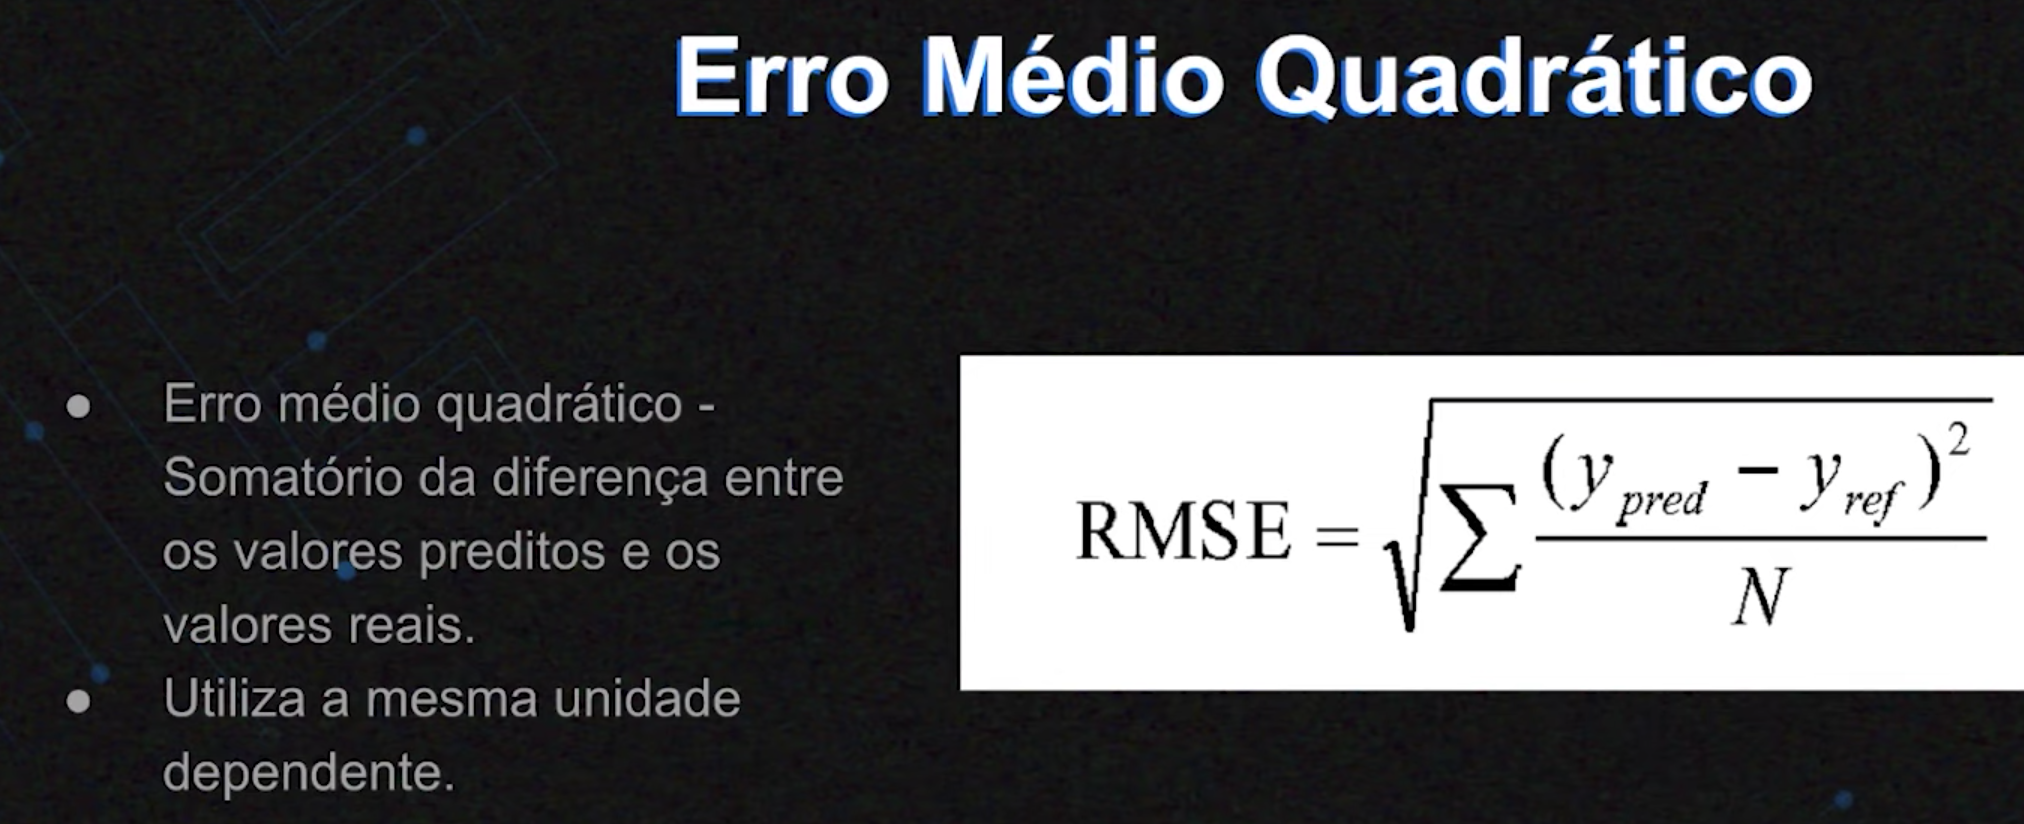

In [46]:
# calcula a métrica rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

In [49]:
rmse = (np.sqrt(mean_squared_error(y_test, predicoes_baseline)))

In [51]:
# imprime a performance do modelo
#RMSE: 6.20
#AS PREDIÇÕES DO BASELINE TEM UM ERRO DE 6MIL DOLARES PARA CIMA OU PARA BAIXO
print ('Performance do modelo baseline:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo baseline:

RMSE é: 6.205816494411828 


### Machine Learning

#### Regressão Linear

FUNCIONA LEVANDO EM CONSIDERAÇÃO QUE HAJA FORTE CORRELAÇÃO ENTRE OS DADOS

- `Devido a correlação entre algumas features podemos usar uma regressão linear.`
- `Modelo simples e eficiente.`
- `Solução rápida e robusta.`

In [52]:
# carrega o pacote LinearRegression
from sklearn.linear_model import LinearRegression

In [53]:
# cria o objeto do tipo LinearRegression
lin_model = LinearRegression()

In [54]:
# TREINO do algoritmo de regressão linear
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# GERANDO PREDIÇÃO para avaliar o modelo nos dados de teste
y_pred = lin_model.predict(X_test)

In [56]:
# calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [61]:
# imprime a performance do modelo
#COM REGRESSÃO LINEAR O ERRO RMSE FOI DE 4.46
#REGRESSÃO LINEAR IRÁ ERRAR OU 4MIL DÓLARES PARA MAIS OU 4MIL DÓLARES PARA MENOS
#SUPEROU A BASELINE QUE TEVE RMSE DE 6.20
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 4.460277295153906 


In [62]:
# atribui os resultados no dataframe df_results
df_results['valor_predito_reg_linear'] = lin_model.predict(X_test)

In [63]:
df_results.head(10)

valor_real  valor_predito_baseline  valor_predito_reg_linear
0        18.5               20.130425                 18.459170
1        12.7               20.130425                 12.279894
2        21.4               20.130425                 24.588307
3        23.7               20.130425                 28.254693
4        20.8               20.130425                 18.195439
5        25.0               20.130425                 21.630648
6         9.7               20.130425                 11.319198
7        14.9               20.130425                 14.561032
8        34.9               35.719231                 31.623717
9        31.6               35.719231                 29.588133

In [64]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Baseline'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#FEBFB3'),
                         name='Valor Predito Regressão Linear'))

# Plota a figura
fig.show()

##### Arvore de decisão

*   `Algoritmo de aprendizado supervisionado`
*   `Explicabilidade do Modelo`
*   `Simples`


In [65]:
# importa o pacote DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [66]:
# cria um objeto do tipo DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [67]:
# treina o algoritmo
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Avaliando o modelo de Árvore de Decisão

In [68]:
# fazendo as previsões
y_pred = regressor.predict(X_test)

In [69]:
# Adicionando o valor do modelo no dataframe df_results
df_results['valor_predito_arvore'] = y_pred

In [70]:
# visualiza o dataframe df_results
df_results.head(10)

valor_real  ...  valor_predito_arvore
0        18.5  ...                  17.8
1        12.7  ...                  23.2
2        21.4  ...                  24.5
3        23.7  ...                  24.3
4        20.8  ...                  21.8
5        25.0  ...                  27.5
6         9.7  ...                   7.2
7        14.9  ...                  17.1
8        34.9  ...                  36.4
9        31.6  ...                  28.7

[10 rows x 4 columns]

In [71]:
import plotly.graph_objects as go

# cria uma figura
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name='Valor Predito Baseline'))


# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines+markers',
                         name='Valor Predito Reg Liner'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines+markers',
                         name='Valor Predito Arvore'))
# Plota a figura
fig.show()

Avaliação do Modelo

In [72]:
# calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [73]:
# imprime a performance do modelo
#RMSE: 5.32, VENCEU O BASELINE, PORÉM PERDEU PARA A REGRESSÃO LINEAR
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 5.321414189817575 


#### Random Forest

- `Método Ensemble`
- `Mais robustez para os modelos`

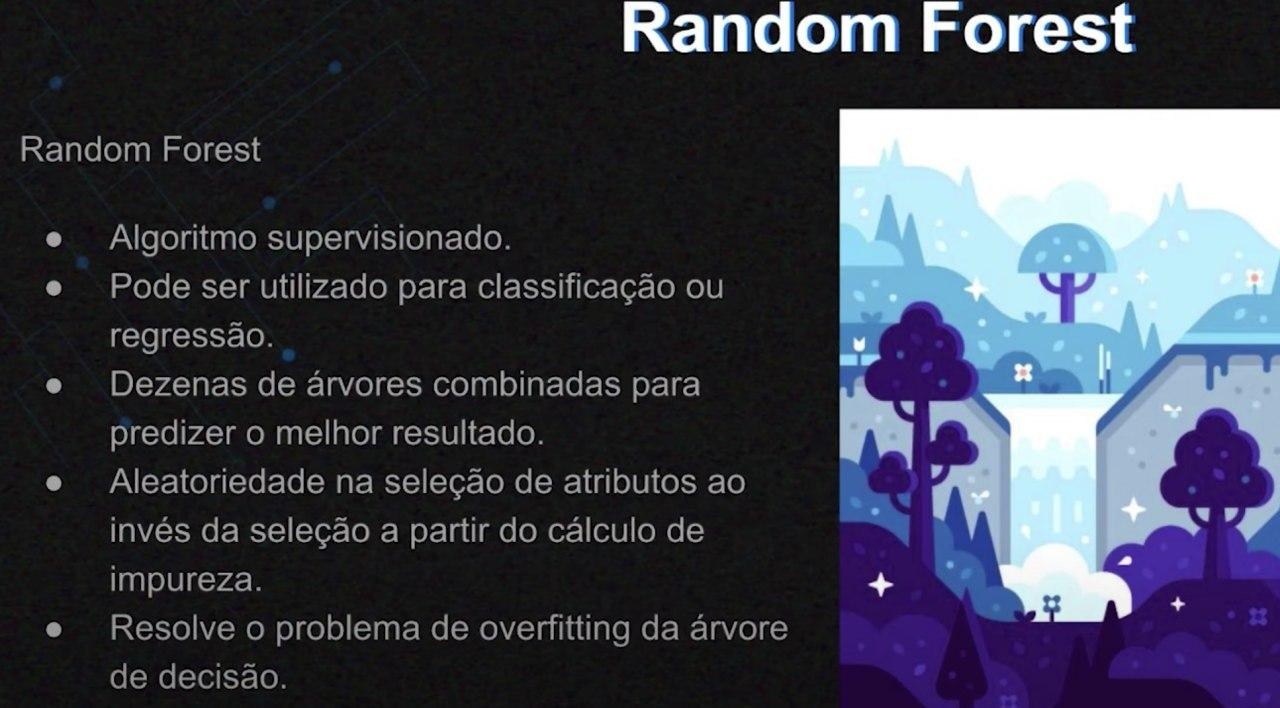

In [74]:
# Importa o método RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [75]:
# cria o objeto rf_regressor
rf_regressor = RandomForestRegressor()

In [76]:
# treina o algoritmo
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [77]:
# avaliação do modelo nos dados de teste
y_pred = rf_regressor.predict(X_test)

In [78]:
# adiciona os resultados no dataframe df_results
df_results['valor_predito_random_forest'] = rf_regressor.predict(X_test)

In [79]:
# calcula a métrica rmse
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [80]:
# imprime a performance do modelo
#RMSE: 3.23, venceu todos os algoritmos testados até aqui, incluindo a baseline
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 3.2395666943816632 


In [81]:
# plota os resultados dos modelos e o valor real.
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='markers',
                         name='Valor Real'))

# Linha com os dados da baseline
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         line = dict(color = '#FF00FF'),
                         name='Valor da Baseline'))

# Linha com os dados preditos pela arvore
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_arvore,
                         mode='lines',
                         line = dict(color = '#B2FF66'),
                         name='Valor Predito Árvore'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#17BECF'),
                         name='Valor Predito Regressão Linear'))


# Linha com os dados preditos pela Random Forest
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_random_forest,
                         mode='lines',
                         line = dict(color = '#7F7F7F'),
                         name='Valor Predito Random Forest'))

# Plota a figura
fig.show()

### Tunning do Algoritmo de Machine Learning

**Parâmetros da Random Forest**

- `O parâmetro n_estimators define a quantidade de árvores que serão usadas para criação dos modelos. Quanto maior o número de árvores, maior será o número de modelos no ensemble.`

- `O parâmtro max_deph define a profundidade da árvore, quanto mais profunda a árvore, mais especializado nos dados de treino o nosso modelo estará.`

- `O parâmetro max_features define a quantidade máxima de nós que serão usados para separar os níveis folha da árvore`

Deploy da Aplicação

In [82]:
X['MEDV'] = y

In [83]:
X.head()

CRIM  INDUS  CHAS    NOX  RM  PTRATIO       B  LSTAT  MEDV
0  0.00632   2.31   0.0  0.538   6     15.3  396.90   4.98  24.0
1  0.02731   7.07   0.0  0.469   6     17.8  396.90   9.14  21.6
2  0.02729   7.07   0.0  0.469   7     17.8  392.83   4.03  34.7
3  0.03237   2.18   0.0  0.458   6     18.7  394.63   2.94  33.4
4  0.06905   2.18   0.0  0.458   7     18.7  396.90   5.33  36.2

In [84]:
X.to_csv('data.csv', index=False)